# Homework 3
## Problem 1 a

In [107]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.datasets import make_classification
from sklearn import datasets
from sklearn.metrics import accuracy_score

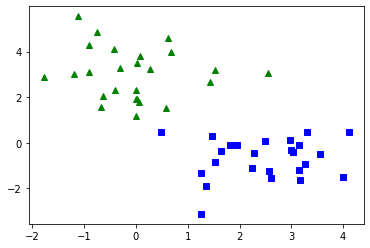

In [108]:
# part 1
# Generate a 2D linearly seperable data with 50 data points
n = 50
X, y = datasets.make_blobs(n_samples=n, centers=2, n_features=2, center_box=(-1, 6), cluster_std=1, random_state=153)
plt.plot(X[:, 0][y == 0], X[:, 1][y == 0], 'g^')
plt.plot(X[:, 0][y == 1], X[:, 1][y == 1], 'bs')
plt.show()


# Split the dataset into training set and test sets
y = y*2-1
y = y.reshape(n,1)

X_train, X_test, Y_train, Y_test = train_test_split(X, y, test_size=0.4,random_state=556)

In [151]:
# defining our Preceptron object
class Perceptron(object):             
  def __init__(self, X_train, Y_train, learning_rate, num_epochs=100, epsilon=1e-5):
    # add one for bias
    self.n, _ = X_train.shape # defining n variable 
    self.X_train = np.c_[np.ones(self.n), X_train]
    _, self.d = self.X_train.shape
    self.weight = np.zeros([self.d, 1])
    self.num_epochs, self.learning_rate, self.epsilon = num_epochs, learning_rate, epsilon
    self.y_true = Y_train

  def predict(self, x):
    z = x.dot(self.weight)
    a = 2*(z>0)-1
    return a   

  # part a.2.
  # modified to fit for part b.2.
  def batch_fit(self, verbose=False, plot=False, linear = True):
    if(linear):
      error_list = []
      for epoch in range(self.num_epochs):
        y_pred = self.predict(self.X_train)
        if np.any([np.squeeze(y_pred) != np.squeeze(self.y_true)]):
          update = np.sum(self.y_true[np.squeeze(y_pred) != np.squeeze(self.y_true)] 
            * self.X_train[np.squeeze(y_pred) != np.squeeze(self.y_true)], axis=0).reshape([self.d,1])
          self.weight += self.learning_rate * update
          err = self.error()
          error_list.append(err)
        else:
          break
    
        if verbose:
          print("Error at epoch {}: {}".format(epoch, err))
        if plot:
          print("epochs {}: the weight:{} \n".format(epoch, self.weight))
          self.plot(self.weight[1], self.weight[2], self.weight[0], epoch)
        
      return self.weight, error_list, epoch+1
    else:
      xx = np.linspace(-1,11)
      yy = (-0.06047375*xx + 0.2)/(-1*0.3633276)
      if plot:
        plt.plot(self.X_train[:, 0][self.y_true == -1], self.X_train[:, 1][self.y_true == -1], 'g^')
        plt.plot(self.X_train[:, 0][self.y_true == 1], self.X_train[:, 1][self.y_true == 1], 'bs')  
        plt.plot(xx, yy)
        plt.xlim(np.min(X_train[:, 0])-1, np.max(X_train[:, 0])+1)
        plt.ylim(np.min(X_train[:, 1])-1, np.max(X_train[:, 1])+1)

      return self.sequential_fit(self)

  # Calculated using RSS (residual sum of squares) error.
  def error(self, X_test=None, y_test=None): # use training data if test not specified
    if X_test is None:
      diff = self.y_true-self.predict(self.X_train)
    else:
      diff = y_test-self.predict(X_test)
    return (diff.T@diff)[0,0]

  def plot(self, a, b, bias, epoch, linear = True):
    y = self.y_true.reshape(len(self.y_true),)
    plt.plot(self.X_train[:, 1][y == -1], self.X_train[:, 2][y == -1], 'yo')
    plt.plot(self.X_train[:, 1][y ==  1], self.X_train[:, 2][y ==  1], 'ro')

    # for linearly seperable data
    if(linear):
      xx = np.linspace(-1,11,5000)
      yy = (a*xx + bias)/(-1*b)
      plt.plot(xx, yy,'b')
      plt.title("epoch "+str(epoch))
      plt.xlim(np.min(self.X_train[:, 1])-1, np.max(self.X_train[:, 1])+1)
      plt.ylim(np.min(self.X_train[:, 2])-1, np.max(self.X_train[:, 2])+1)
      plt.show()
    # for non linearly seperable data
    else:
        plt.show()

  # part a.4.
  def sequential_fit(self, verbose=False, plot=False):
    error_list = []
    for epoch in range(self.num_epochs):
      if np.all([np.squeeze(self.predict(self.X_train)) == np.squeeze(self.y_true)]):
        break
      for i in range(self.n):
        y_pred = self.predict(self.X_train[i])
        if y_pred != self.y_true[i]:
          self.weight = self.weight + self.learning_rate*(self.y_true[i] * self.X_train[i].reshape([self.d,1]))
      err = self.error()   
      error_list.append(self.error())

      if verbose:
        print("Error at epoch {}: {}".format(epoch, err))
      if plot:
        print("epochs {}: the weight:{} \n".format(epoch, self.weight))
        self.plot(self.weight[1], self.weight[2], self.weight[0], epoch)

    return self.weight, error_list, epoch+1

epochs 0: the weight:[[ 0.14      ]
 [ 0.36847382]
 [-0.07923288]] 



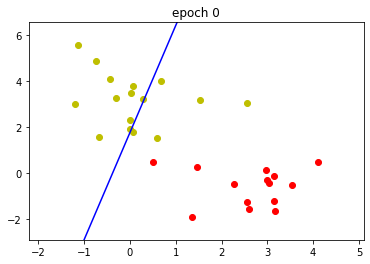

epochs 1: the weight:[[ 0.09      ]
 [ 0.31436292]
 [-0.21522912]] 



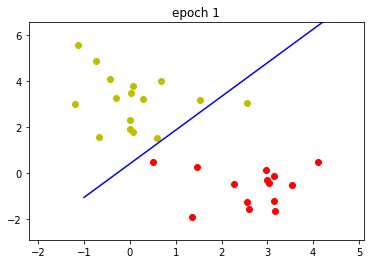

epochs 2: the weight:[[ 0.08      ]
 [ 0.28885785]
 [-0.24588645]] 



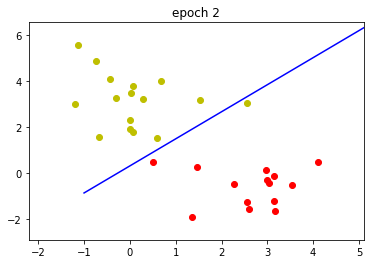

epochs 3: the weight:[[ 0.07      ]
 [ 0.26335278]
 [-0.27654379]] 



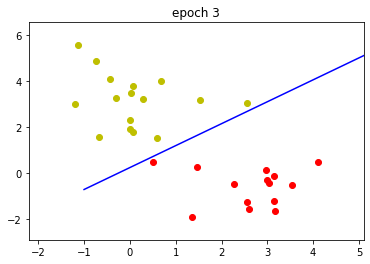

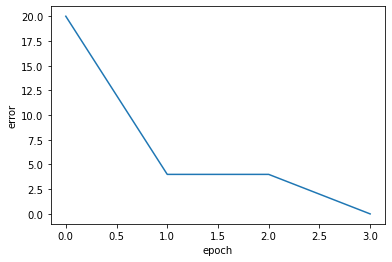

In [121]:
# Part 2
Y_train_batch = Y_train
X_train_batch = X_train

# Implement Batch Perceptron model
perceptron = Perceptron(X_train_batch, Y_train_batch, num_epochs=50,learning_rate = 0.01)
w, in_err, converge_iter = perceptron.batch_fit(plot = False, verbose=False)
#print(w, in_err, converge_iter)

# Plot the error function curve
plt.plot(in_err)
plt.ylabel('error')
plt.xlabel('epoch')
plt.show()

In [122]:
# part 3
y_pred = []
X_test_batch_accurancy = np.c_[np.ones(X_test.shape[0]), X_test]
for i in range(len(X_test_batch_accurancy)):
 y_pred.append(perceptron.predict(X_test_batch_accurancy[i]))
acc1 = accuracy_score(Y_test, y_pred)

print(acc1)

1.0


Error at epoch 0: 0
epochs 0: the weight:[[ 0.05      ]
 [ 0.17839359]
 [-0.17142032]] 



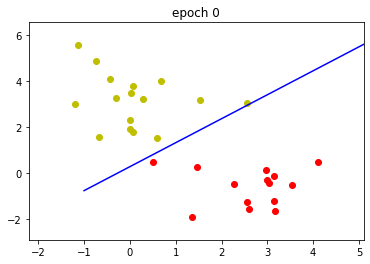

[[ 0.05      ]
 [ 0.17839359]
 [-0.17142032]] [0] 2


In [125]:
# part 4 - sequential defined in function above
X_train_seq = X_train
Y_train_seq = Y_train

perceptron = Perceptron(X_train_seq, Y_train_seq, num_epochs=200,learning_rate = 0.05)
w, in_err, converge_iter = perceptron.sequential_fit(verbose = True, plot=True)
print(w, in_err, converge_iter)

In [124]:
# part 5 
y_pred = []
X_test_seq_accurancy = np.c_[np.ones(X_test.shape[0]), X_test]
for i in range(len(X_test_batch_accurancy)):
 y_pred.append(perceptron.predict(X_test_seq_accurancy[i]))
acc2 = accuracy_score(Y_test, y_pred)

print(acc2)


1.0


## Problem 1b

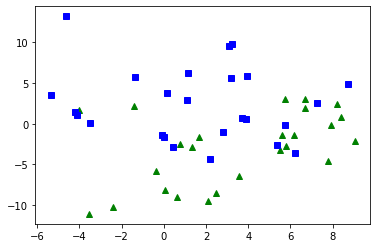

In [163]:
# part 1
# Generate a 2D linearly seperable data with 50 data points
n = 50
X, y = datasets.make_blobs(n_samples=n, centers=2, n_features=2, center_box=(-3, 3), cluster_std=4.5, random_state=1274)
plt.plot(X[:, 0][y == 0], X[:, 1][y == 0], 'g^')
plt.plot(X[:, 0][y == 1], X[:, 1][y == 1], 'bs')
plt.show()
plt.show()

Error at epoch 0: 28
Error at epoch 1: 28
Error at epoch 2: 40
Error at epoch 3: 28
Error at epoch 4: 36
Error at epoch 5: 28
Error at epoch 6: 36
Error at epoch 7: 36
Error at epoch 8: 24
Error at epoch 9: 32
Error at epoch 10: 28
Error at epoch 11: 24
Error at epoch 12: 36
Error at epoch 13: 36
Error at epoch 14: 48
Error at epoch 15: 32
Error at epoch 16: 32
Error at epoch 17: 32
Error at epoch 18: 36
Error at epoch 19: 32
Error at epoch 20: 28
Error at epoch 21: 28
Error at epoch 22: 28
Error at epoch 23: 36
Error at epoch 24: 28
Error at epoch 25: 36
Error at epoch 26: 32
Error at epoch 27: 24
Error at epoch 28: 28
Error at epoch 29: 28
Error at epoch 30: 28
Error at epoch 31: 28
Error at epoch 32: 40
Error at epoch 33: 36
Error at epoch 34: 24
Error at epoch 35: 32
Error at epoch 36: 24
Error at epoch 37: 48
Error at epoch 38: 36
Error at epoch 39: 28
Error at epoch 40: 36
Error at epoch 41: 32
Error at epoch 42: 28
Error at epoch 43: 32
Error at epoch 44: 48
Error at epoch 45: 3

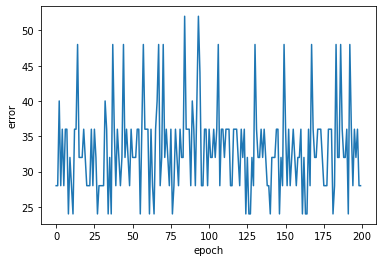

In [164]:
# part 2
y = y*2-1
y = y.reshape(n,1)

X_train, X_test, Y_train, Y_test = train_test_split(X, y, test_size=0.3,random_state=655)

perceptron = Perceptron(X_train, Y_train, num_epochs=200,learning_rate = 1)
w, in_err, converge_iter = perceptron.batch_fit(plot=False, linear = False)

# Plot the error function curve
plt.plot(in_err)
plt.ylabel('error')
plt.xlabel('epoch')
plt.show()